### List of tasks
- read file
- analyze number of reviews for each theme
- how many reviews were positive and negative

In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
#import visualization models
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [3]:
# import stats modules
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency
from scipy.sparse import hstack

In [4]:
#read file into notebook
df = pd.read_csv('APPAREL_ids_1_2019.csv', index_col=0)

In [5]:
#check file info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, academy58403947 to zappos5389083
Data columns (total 14 columns):
domain_global_string       300 non-null object
review_rating              300 non-null int64
review_text                300 non-null object
review_title               278 non-null object
use_sentiment_label        146 non-null object
use_theme_exists           156 non-null float64
fit_sentiment_label        220 non-null object
fit_theme_exists           226 non-null float64
value_sentiment_label      93 non-null object
value_theme_exists         99 non-null float64
style_sentiment_label      180 non-null object
style_theme_exists         183 non-null float64
quality_sentiment_label    201 non-null object
quality_theme_exists       215 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 35.2+ KB


In [6]:
df.head()

,domain_global_string,review_rating,review_text,review_title,use_sentiment_label,use_theme_exists,fit_sentiment_label,fit_theme_exists,value_sentiment_label,value_theme_exists,style_sentiment_label,style_theme_exists,quality_sentiment_label,quality_theme_exists
_id,,,,,,,,,,,,,,
academy58403947,APPAREL,5,The shorts were excellent in color and style. ...,NaN,NaN,NaN,NaN,NaN,pos,1.0,pos,1.0,NaN,NaN
adidas100338674,APPAREL,4,Fab running shorts. Only thing I'd change is t...,Retro vibe running!,pos,1.0,NaN,NaN,NaN,NaN,NaN,NaN,pos,1.0
adidas102938471,APPAREL,5,"Just looks amazing and classy. Plus, it is sup...",Easy and stress free online experience. This f...,pos,1.0,pos,1.0,pos,1.0,pos,1.0,NaN,NaN
amazonR17DE72WNC7FQM,APPAREL,1,I should have taken a little more time when lo...,Disappointing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pos,1.0
amazonR19HL1JO6GEKJK,APPAREL,4,WAS SOME WHAT LARGE FOR 8 AND 9 YEAR OLD AND W...,ASICS WOMWNS CIRCUIT 7 SINGLET X SMAL,NaN,NaN,neg,1.0,pos,1.0,NaN,NaN,NaN,NaN


In [7]:
# looks like review text, sentiment label and theme existence have some null values.
# interesting...some themes are missing sentiment.
# the missing sentiments will be left as is - could be neutral or missed by machine model
df.describe()

,review_rating,use_theme_exists,fit_theme_exists,value_theme_exists,style_theme_exists,quality_theme_exists
count,300.000000,156.0,226.0,99.0,183.0,215.0
mean,4.320000,1.0,1.0,1.0,1.0,1.0
std,1.212091,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.0,1.0,1.0,1.0,1.0
25%,4.000000,1.0,1.0,1.0,1.0,1.0
50%,5.000000,1.0,1.0,1.0,1.0,1.0
75%,5.000000,1.0,1.0,1.0,1.0,1.0
max,5.000000,1.0,1.0,1.0,1.0,1.0


In [8]:
df.columns

Index(['domain_global_string', 'review_rating', 'review_text', 'review_title',
       'use_sentiment_label', 'use_theme_exists', 'fit_sentiment_label',
       'fit_theme_exists', 'value_sentiment_label', 'value_theme_exists',
       'style_sentiment_label', 'style_theme_exists',
       'quality_sentiment_label', 'quality_theme_exists'],
      dtype='object')

In [9]:
#find number of reviews for each theme
#find how many positive and negative sentiments for each theme
themes = [ 'use', 'fit', 'value', 'style', 'quality']
rows = []
for t in themes:
    c1 = t + '_sentiment_label'
    c2 = t + '_theme_exists'
    n_theme = (df[c2] == 1).sum() 
    n_pos = (df[c1] == 'pos').sum()
    n_neg = (df[c1] == 'neg').sum() 
    row = {
        'theme':t,
        'n_theme':n_theme, 
        'n_pos':n_pos, 
        'n_neg':n_neg, 
    }
    rows.append( row )
df2 = pd.DataFrame( rows )
df2

,n_neg,n_pos,n_theme,theme
0,13,133,156,use
1,15,205,226,fit
2,14,79,99,value
3,15,165,183,style
4,33,168,215,quality


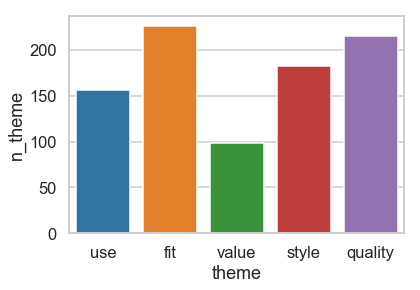

In [11]:
# visual check of themes to number of themes
sns.barplot(x='theme', y='n_theme', data=df2)

This is interesting; one review has multiple themes present (the overall total n_theme does not equal 300). Fit and quality of material seems to be the most common themes present followed by style, use and value.

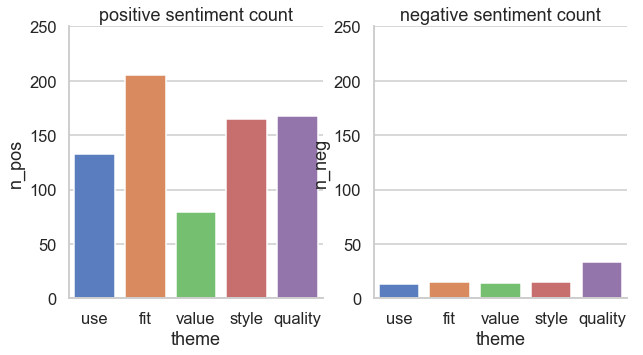

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

#Compare and plot the n_pos sentiment of themes 
sns.barplot(data=df2, y = 'n_pos', 
            x = 'theme', palette="muted", ax=axs[0])
axs[0].set_title('positive sentiment count')
axs[0].set_ylim(0,250)
axs[0].set_xlabel('theme')

#Compare and plot the n_neg sentiment of themes 
sns.barplot(data=df2, y = 'n_neg', 
            x = 'theme', palette="muted", ax=axs[1])
axs[1].set_title('negative sentiment count')
axs[1].set_ylim(0,250)
axs[1].set_xlabel('theme')
sns.despine()

This is great. Most of the sentiment in this review is positive. The greatest negative sentiment is quality, even then the only need for improvement is slight. 